# 1.0 Importing and Cleaning Data

Data retrieved from https://data.oaklandca.gov/Infrastructure/Service-requests-received-by-the-Oakland-Call-Cent/quth-gb8e <br>
Our goal is to take a deep dive into this data to discover any trends and identify and potential areas that need improvement.

### Data Legend
REQUESTID = The service request number. This should be shown as an integer without decimals. 5-digit REQUESTIDs were imported from the Recycling Hotline’s prior tracking system when they switched to the same system as the Oakland Call Center in August 2012. All others are 6 digits.

DATETIMEINIT = The Date that the request was initiated.

SOURCE = Indicates if the request was received via SeeClickFix or the OAK 311 mobile app, via the legacy Report A Problem website, or via (Phone or Email).

DESCRIPTION = Type of issue. Most of these are self-explanatory. Notes: “test template” and “This is a test subject. Ignore this ticket.” were for testing/training purposes only. Descriptions starting with “Business” “City Services” “CityBldg” (no space) “Events” “Misc” are/were used by the Recycling Hotline “TE” means “Traffic Engineering”

REQCATEGORY = Request Category

REQADDRESS = Request Address An address of ZZ indicates that the address was not recorded, usually this is for general inquiries to the Recycling Hotline.


STATUS = The status as of date of upload. PENDING: Request received for review OPEN: Request assigned to work unit WOCREATE: Work Order created for work to be done (not all work units use this status, so Open service requests may also have work orders created for work to be done) CLOSED: Request is resolved REFERRED: Oakland Call Center received the request and forwarded it to another entity (see REFERREDTO) UNFUNDED: Request is for an service that the City is not funded to provide CANCEL: Request was canceled, generally because it was created erroneously, it was used for testing/training, or it is a request that was received that duplicated an existing unresolved request WAITING ON CUSTOMER: Request involves a process where customer needs to provide information requested by staff EVALUATED - NO FURTHER ACTION: Staff has evaluated the service request and no further action will be taken (e.g., limited resources, temporary issue, staff alerted to ongoing issue, professional judgement says to leave situation as-is, unable to provide requested action) GONE ON ARRIVAL: Staff went to location and was unable to verify the issue

DATETIMECLOSED = The Date that the request was closed

SRX, SRY= Coordinates of the issue. Note that this is in NAD_1983_StatePlane_California_III_FIPS_0403_Feet, not latitude/longitude.

REFERREDTO = If the status is Referred, this shows who it was referred to.

COUNCILDISTRICT = City Council District of the REQADDRESS.

BEAT = Police Beat of the REQADDRESS (see http://mapgis.oaklandnet.com/PoliceDistricts/ for a map of police beats)
Less

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv('service_requests.csv', index_col='DATETIMEINIT', parse_dates=[0])

In [3]:
df.head()

,REQUESTID,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State
DATETIMEINIT,,,,,,,,,,,,,,,
05/04/2020 02:30:20 PM,1006885,SeeClickFix,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.776827186500626, -122.20229629081079)",CLOSED,NaN,05/05/2020 08:32:17 PM,6.069706e+06,2.109797e+06,CCD4,27X,4910 CONGRESS AVE,Oakland,CA
05/19/2020 04:10:50 PM,1011203,Phone or Email,Tree - Other/Complex,TREES,NaN,UNFUNDED,NaN,NaN,NaN,NaN,NaN,NaN,975 West Grand Avenue,Oakland,CA
04/14/2020 06:25:27 PM,1002134,Phone or Email,Parking - Abandoned Vehicle,POLICE,"(37.81049743844825, -122.2763000836974)",CLOSED,NaN,04/14/2020 06:59:36 PM,6.048554e+06,2.122452e+06,CCD3,05X,750 19TH ST,Oakland,CA
04/17/2020 08:58:20 PM,1002970,SeeClickFix,Streets - Potholes/Depression,STREETSW,"(37.807848000931806, -122.21635949886752)",CANCEL,NaN,NaN,6.065849e+06,2.121164e+06,CCD5,16Y,1374 EL CENTRO AVE,Oakland,CA
04/16/2020 03:33:13 PM,1002653,Phone,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.81001053781014, -122.29501913005603)",CLOSED,NaN,04/19/2020 07:50:04 PM,6.043144e+06,2.122378e+06,CCD3,02Y,12TH ST & PERALTA ST,Oakland,CA


In [4]:
df.columns

Index(['REQUESTID', 'SOURCE', 'DESCRIPTION', 'REQCATEGORY', 'REQADDRESS',
       'STATUS', 'REFERREDTO', 'DATETIMECLOSED', 'SRX', 'SRY',
       'COUNCILDISTRICT', 'BEAT', 'PROBADDRESS', 'City', 'State'],
      dtype='object')

In [5]:
df.columns = ['request_id', 'source', 'description', 'category', 'req_address', 'status', 'ref_to', 
             'date_closed', 'srx', 'sry', 'council_district', 'beat', 'prob_address', 'city', 'state']

## 1.1 Getting to Know the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769939 entries, 05/04/2020 02:30:20 PM to 03/31/2020 01:53:04 PM
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   request_id        769939 non-null  object 
 1   source            769939 non-null  object 
 2   description       769939 non-null  object 
 3   category          769859 non-null  object 
 4   req_address       755997 non-null  object 
 5   status            769939 non-null  object 
 6   ref_to            65357 non-null   object 
 7   date_closed       556666 non-null  object 
 8   srx               755997 non-null  float64
 9   sry               755997 non-null  float64
 10  council_district  730549 non-null  object 
 11  beat              732549 non-null  object 
 12  prob_address      769471 non-null  object 
 13  city              769939 non-null  object 
 14  state             769939 non-null  object 
dtypes: float64(2), object(13)
memory usa

Since all the data is stored as objects, it doesn't make sense to do much additional exploration at this point. Instead, I will proceed to clean the data.

## 1.2 Cleaning Data

In [7]:
df.sort_values(by='DATETIMEINIT', inplace=True)

In [8]:
# Since srx and sry are localation information unique to California, we can drop this information for our purposes
df.drop(['srx', 'sry'], axis=1, inplace=True)

In [9]:
df.tail()

,request_id,source,description,category,req_address,status,ref_to,date_closed,council_district,beat,prob_address,city,state
DATETIMEINIT,,,,,,,,,,,,,
12/31/2020 12:50:52 PM,1077512,Phone,Engineering - Other/Complex,OTHER,"(37.72874098936146, -122.17678506624787)",OPEN,NaN,NaN,CCD7,31Z,10803 ESTEPA DR,Oakland,CA
12/31/2020 12:52:49 PM,1077513,SeeClickFix,Parking - Abandoned Vehicle,POLICE,"(37.8441146083377, -122.24546235754546)",OPEN,NaN,NaN,CCD1,13X,6043 LAWTON AVE,Oakland,CA
12/31/2020 12:55:38 PM,1077514,SeeClickFix,Parking - Abandoned Vehicle,POLICE,"(37.79396333014077, -122.2130133271437)",CANCEL,NaN,NaN,CCD5,21Y,3146 COOLIDGE AVE,Oakland,CA
12/31/2020 12:58:35 PM,1077515,SeeClickFix,Parking - Abandoned Vehicle,POLICE,"(37.790390435015894, -122.25212183491203)",OPEN,NaN,NaN,CCD2,19X,1025 10TH AVE,Oakland,CA
12/31/2020 12:59:06 PM,1077516,Email,Trash - Missed Pickup,RECYCLING,"(37.79269629540023, -122.25261754487526)",CLOSED,NaN,12/31/2020 01:53:05 PM,CCD2,19X,1171 8TH AVE,Oakland,CA


In [10]:
df['city'].value_counts()

Oakland    769939
Name: city, dtype: int64

In [11]:
df['state'].value_counts()

CA    769939
Name: state, dtype: int64

As suspected, the city and state are all Oakland, California. With that in mind, we won't need to retain this information for any analysis. We can also drop the street address, as our purpose here will not require that level of detail. After that, we will split our req_address as longitutde and latitude, as this will enable us to map reports if desired. 

In [12]:
df.drop(['city', 'state', 'prob_address'], axis=1, inplace=True)

In [13]:
lat_long = df['req_address'].str.strip('()')                               \
                   .str.split(', ', expand=True)                   \
                   .rename(columns={0:'Latitude', 1:'Longitude'}) 

In [14]:
df = pd.concat([df, lat_long], axis=1)

In [15]:
df.drop('req_address', axis=1, inplace=True)

In [16]:
df.head()

,request_id,source,description,category,status,ref_to,date_closed,council_district,beat,Latitude,Longitude
DATETIMEINIT,,,,,,,,,,,
01/01/2011 05:51:45 PM,355940,Website,Other Engineering Issues,TRAFFIC,CLOSED,NaN,01/10/2011 09:11:45 AM,CCD1,13Y,37.88300604946682,-122.24580325665384
01/01/2011 10:10:58 PM,355941,Website,Streets - Potholes/Depression,STREETSW,CLOSED,NaN,09/26/2012 12:02:34 PM,CCD3,08X,37.81863505639732,-122.25415424155592
01/01/2012 03:24:15 PM,392547,Website,Litter - In Public Right of Way,ILLDUMP,CLOSED,NaN,01/06/2012 10:43:59 AM,CCD6,30X,37.758104646856275,-122.18478939507882
01/01/2012 03:38:18 PM,392548,Website,Litter - In Public Right of Way,ILLDUMP,CLOSED,NaN,01/04/2012 01:04:24 PM,CCD4,25X,37.7844124552679,-122.18081083730678
01/01/2012 04:12:18 PM,392549,Website,Animal and Insect Control,OTHER,REFERRED,"OPD ANIMAL SERVICES,",NaN,CCD3,05X,37.81227417841407,-122.2805044255286


Here we have cut down our dataframe to just the pieces of information important for our analysis and information gathering. 

## 1.3 Filling Null Values

In [17]:
df.isna().sum()

request_id               0
source                   0
description              0
category                80
status                   0
ref_to              704582
date_closed         213273
council_district     39390
beat                 37390
Latitude             13942
Longitude            13942
dtype: int64

Looking at null values, our first and lowest number is category. In this instance, especially with an 'Other' category already in place and considering the small number it should be safe to simply assign these null values as part of the 'other' category.<br><br>
Next, we see ref_to. In a real-world environment, I would consult with the data engineer or personnel in the department to confirm, but again it should be safe to assume that these cases were not routed elsewhere. I.E., no referral was made. 
<br><br>
Similarly, date_closed appears straightforward on the surface -we may approach this in various ways depending on our needs. I.E., we can leave them null, or if we need to make any assessments, we can easily split the data between those that are open and closed. Regardless, my first step here is to ensure all those without a date_closed value are in fact listed as 'OPEN' in the status column. 
<br><br>
For council_district and beat, this gets a little trickier. However, if we do need to perform any data modeling, the percentage of null values is well under 10%, which will allow us to simply drop null values in those cases. For now, I will assign them both a generic value of 'uknw' to signify the data is unknown. 
<br><br>
Finally, our null latitude and longitude will only impact our mapping efforts. When it comes time to map the data, I can simply drop these points as we lack meaningful insight. 

In [18]:
df['category'].fillna('OTHER', inplace=True)

In [19]:
ref_to = df[df['ref_to'].isna()]

In [20]:
ref_to[ref_to['status'] == 'REFERRED'].count()

request_id          89
source              89
description         89
category            89
status              89
ref_to               0
date_closed          0
council_district    89
beat                89
Latitude            89
Longitude           89
dtype: int64

We see in checking that about 89 of the missing ref_to values are listed as "Referred" under status. For right now, we will still make the change, but put this note here to remind ourselves that these 89 instances should be revisited if we want the most accurate analysis. 

In [21]:
df['ref_to'].fillna('NOT REFERRED', inplace=True)

In [22]:
not_closed = df[df['date_closed'].isna()]

In [23]:
not_closed[not_closed['status'] == 'CLOSED'].count()

request_id          6
source              6
description         6
category            6
status              6
ref_to              6
date_closed         0
council_district    6
beat                6
Latitude            5
Longitude           5
dtype: int64

I again include a note here to revist these six instances where there is a discrepency. For our purposes, we may be best to just drop these 6 results entirely. But, for now, we will proceed to fill this with a future data to make processing smoother. Keep in mind, we may revisit how this is processed later, as setting it in this fashion could interfere with key insights (i.e. is there a category where the time to close an issue is longer, or perhaps where issues aren't being properly closed at all?) 

In [24]:
df['date_closed'].fillna('12/31/2030 12:01:01 AM', inplace=True)

In [25]:
df['date_closed'] = pd.to_datetime(df['date_closed'])

In [26]:
df['council_district'].fillna('unkn', inplace=True)
df['beat'].fillna('unkn', inplace=True)

In [27]:
df.isna().sum()

request_id              0
source                  0
description             0
category                0
status                  0
ref_to                  0
date_closed             0
council_district        0
beat                    0
Latitude            13942
Longitude           13942
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769939 entries, 01/01/2011 05:51:45 PM to 12/31/2020 12:59:06 PM
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   request_id        769939 non-null  object        
 1   source            769939 non-null  object        
 2   description       769939 non-null  object        
 3   category          769939 non-null  object        
 4   status            769939 non-null  object        
 5   ref_to            769939 non-null  object        
 6   date_closed       769939 non-null  datetime64[ns]
 7   council_district  769939 non-null  object        
 8   beat              769939 non-null  object        
 9   Latitude          755997 non-null  object        
 10  Longitude         755997 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 70.5+ MB


Again, we note that latitude and longitude still have null values. Since we will only really be using those for mapping, we will leave those null for now.<br><br>
Further, we note that all entries are of the object Dtype except date_closed. When we get to modeling our data, we can look at transforming some of this data to better be understood by machine learning. For our initial analysis however, it's better to leave as is for clarity. 

# 2.0 Exploratory Data Analysis (EDA)

In [29]:
df['source'].value_counts()

SeeClickFix       331993
Phone             148900
Phone or Email    147508
Website            77235
Email              48850
Voicemail          10743
Other               4518
City Attorney        192
Name: source, dtype: int64

We see by far that SeeClickFix is the most popular method of citizens to make contact for these incidents. We'll explore later if this might hold true across all categories of reports. 

In [30]:
df['description'].value_counts()

Illegal Dumping - debris, appliances, etc.     179989
Illegal Dumping � mattress/boxspring            43276
Parking - Abandoned Vehicle                     43129
Streets - Potholes/Depression                   33597
Code Enforcement                                25127
                                                ...  
Other City Services - Internal (Test)               1
Residential Recycling - Pre-6AM Collection          1
This is a test subject. Ignore this ticket.         1
Curb Ramp - Install/Repair - ADA Request            1
Other Facilities Services (elevator)                1
Name: description, Length: 443, dtype: int64

As suspected, this category should be reexamined by leadership. Specifically, we see only 443 different entries. This, combined with the large numbers at the top, suggest there ought to be standard descriptions in place. Rather than the "one-off" descriptions that are being added. <br><br>
Specifically, I would recommend limiting these descriptions to as few as possible to ensure consistency in reports. Ideally, no more than 20-30 overarching descriptors should suffice. When training new agents and when evaluating existing agents, it is important that they hold to a standard description for individual issues. <br><br>
If more details are required, or if a subject comes up that does not perfectly fit a standard descriptor, agents should have the ability to take additional notes to include with their report. 

In [31]:
df['category'].value_counts()

ILLDUMP           282937
OTHER              73805
BLDGMAINT          65693
STREETSW           45320
POLICE             43132
GRAFFITI           34040
ELECTRICAL         30757
RECYCLING          27861
TREES              26651
TRAFFIC            20906
PARKS              19703
TRAFFIC_ENGIN      14370
SEWERS             13559
DRAINAGE           11265
METER_REPAIR        8668
PARKING             8599
HE_CLEAN            7751
ROW_INSPECTORS      7512
KOCB                6434
ROW_STREETSW        5987
FIRE                5279
ROW                 4371
CUT_CLEAN           3981
CW_DIT_GIS           518
WATERSHED            446
FACILITIES           321
VEGCONTR              39
SURVEY                27
GIS                    4
LAB                    2
OPD                    1
Name: category, dtype: int64

Here we see more of the categorization that can help organize and sort the data. However, there is likely still some overlap among categories that can be limited. <br><br>
Aside from reevaluating this, I note here that illegal dumping seems to take up nearly a third of the incidents being reported. Other is the second highest. In the latter case, I'll want to dig into these incidents and explore the description column to see if that helps explain the "other" category. 
<br><br>
Regardless, the rest of the data can be examined more closely later. For now, we have a foundational understanding of the data and what we should expect. To make this easier for other to interpret, we'll move onto visual EDA.

## 2.1 Visual EDA

In [32]:
source = df['source'].value_counts()

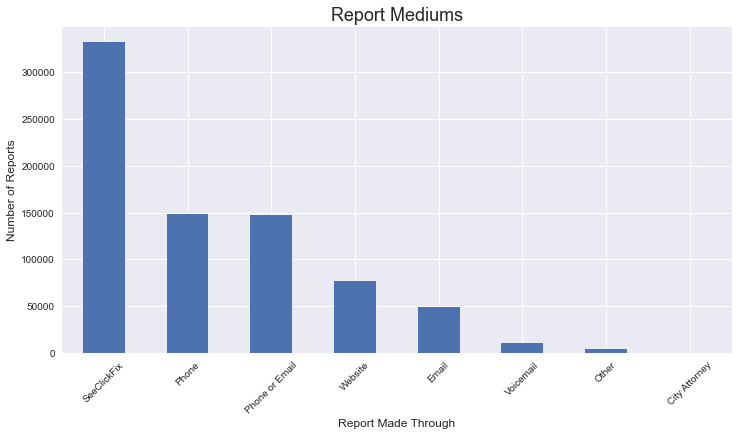

In [37]:
source.plot(kind='bar', figsize=(12,6))
plt.style.use('seaborn')
plt.title('Report Mediums', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Report Made Through', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12);